Rhedson Esashika\
X: rhedesashika \
Instagram: @rhedson\
LinkedIn: www.linkedin.com/in/esashika/

# About the Notebook

## Context | Contexto

This notebook deals with scanned images of the brains of patients diagnosed with brain tumors. These images are an essential tool for the medical and scientific community, providing a valuable resource for training and testing machine learning models. These models help to detect and diagnose medical conditions accurately.

Este notebook trata de imagens digitalizadas do cérebro de pacientes diagnosticados com tumores cerebrais. Essas imagens são uma ferramenta essencial para a comunidade médica e científica, fornecendo um recurso valioso para o treinamento e teste de modelos de aprendizado de máquina. Estes modelos ajudam a detectar e diagnosticar condições médicas com precisão.

## Content | Conteúdo
The dataset is divided into separate files for training and test data. Each set includes features of the images, such as intensity, location, and size of the tumor, as well as labels that classify the type and severity of the tumor. This organization facilitates the processing and analysis of the data, allowing for an accurate assessment of the performance of the developed models.

O conjunto de dados está dividido em arquivos separados para os dados de treinamento e teste. Cada conjunto inclui características das imagens, como intensidade, localização e tamanho do tumor, bem como rótulos que classificam o tipo e a gravidade do tumor. Essa organização facilita o processamento e a análise dos dados, permitindo uma avaliação precisa do desempenho dos modelos desenvolvidos.

## Link
## Access the Dataset | Acesso ao Dataset
https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset

## Install & Configurations files

In [ ]:
!pip install -q kaggle
!pip install -q split-folders
!pip install -q torch-summary

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle
#set JSON file location | Escolha o local do arquivo Json do Kaggle
! cp /content/drive/MyDrive/machine_learning/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d preetviradiya/brian-tumor-dataset
! unzip brian-tumor-dataset

Dataset URL: https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset
License(s): GPL-2.0
100% 107M/107M [00:07<00:00, 20.3MB/s]
100% 107M/107M [00:07<00:00, 15.9MB/s]
Archive:  brian-tumor-dataset.zip
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain T

In [ ]:
# Numerical computing with arrays | Computação numérica com arrays
import numpy as np

# Data manipulation and analysis | Manipulação e análise de dados
import pandas as pd

# Plotting library | Biblioteca de plotagem
import matplotlib.pyplot as plt

# Statistical data visualization | Visualização estatística de dados
import seaborn as sns; sns.set(style='darkgrid')

# Utility for copying objects | Utilitário para copiar objetos
import copy

# Interacting with the operating system | Interação com o sistema operacional
import os

# PyTorch library for machine learning | Biblioteca PyTorch para aprendizado de máquina
import torch

# Image processing with Python Imaging Library | Processamento de imagem com Python Imaging Library
from PIL import Image

# PyTorch utility for datasets | Utilitário PyTorch para datasets
from torch.utils.data import Dataset

# PyTorch vision utilities | Utilitários de visão PyTorch
import torchvision

# Transforms for image processing | Transformações para processamento de imagens
import torchvision.transforms as transforms

# Splitting datasets randomly | Divisão aleatória de datasets
from torch.utils.data import random_split

# Learning rate scheduler | Agendador de taxa de aprendizado
from torch.optim.lr_scheduler import ReduceLROnPlateau

# PyTorch neural network module | Módulo de rede neural PyTorch
import torch.nn as nn

# Utility functions for vision tasks | Funções utilitárias para tarefas de visão
from torchvision import utils

# Datasets for image classification | Datasets para classificação de imagens
from torchvision.datasets import ImageFolder

# Splitting folders into train/val/test sets | Dividindo pastas em conjuntos de treino/validação/teste
import splitfolders

# Summary of model architecture | Resumo da arquitetura do modelo
from torchsummary import summary

# PyTorch functional operations | Operações funcionais do PyTorch
import torch.nn.functional as F

# File path manipulations | Manipulações de caminho de arquivo
import pathlib

# Evaluation metrics | Métricas de avaliação
from sklearn.metrics import confusion_matrix, classification_report

# Tools for building and displaying confusion matrices | Ferramentas para construir e exibir matrizes de confusão
import itertools

# Progress bar for Jupyter notebooks | Barra de progresso para notebooks Jupyter
from tqdm.notebook import trange, tqdm

# PyTorch optimizers | Otimizadores PyTorch
from torch import optim

# Suppress warnings | Suprimir avisos
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load metadata
labels_df = pd.read_csv('metadata.csv')
print(labels_df.head().to_markdown())

|    |   Unnamed: 0 | image           | class   | format   | mode   | shape         |
|---:|-------------:|:----------------|:--------|:---------|:-------|:--------------|
|  0 |            0 | Cancer (1).jpg  | tumor   | JPEG     | RGB    | (512, 512, 3) |
|  1 |            1 | Cancer (1).png  | tumor   | PNG      | L      | (300, 240)    |
|  2 |            2 | Cancer (1).tif  | tumor   | TIFF     | RGB    | (256, 256, 3) |
|  3 |            3 | Cancer (10).jpg | tumor   | JPEG     | RGB    | (512, 512, 3) |
|  4 |            4 | Cancer (10).tif | tumor   | TIFF     | RGB    | (256, 256, 3) |


In [ ]:
os.listdir('Brain Tumor Data Set/Brain Tumor Data Set')

['Brain Tumor', 'Healthy']

In [ ]:
labels_df.shape

(4600, 6)

#Data preprocessing

In [ ]:
# Dataset path | Caminho do conjunto de dados
data_dir = 'Brain Tumor Data Set/Brain Tumor Data Set'
data_dir = pathlib.Path(data_dir)

# Split dataset into train, validation, and test sets | Dividir o conjunto de dados em conjuntos de treino, validação e teste
splitfolders.ratio(data_dir, output='brain', seed=20, ratio=(0.8, 0.2))

# New dataset path after splitting | Novo caminho do conjunto de dados após a divisão
data_dir = 'brain'
data_dir = pathlib.Path(data_dir)


Copying files: 4600 files [00:00, 6343.47 files/s]


#Image Augmentation Definitions
The purpose of these transformations is to prepare and augment the image dataset for training machine learning models, making the model more robust and improving its generalization ability.


---


O objetivo dessas transformações é preparar e aumentar o conjunto de dados de imagens para treinamento de modelos de aprendizado de máquina, tornando o modelo mais robusto e melhorando sua capacidade de generalização.

In [ ]:
# define transformation
transform = transforms.Compose(
    [
        transforms.Resize((256,256)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(30),
        transforms.ToTensor(),
        transforms.Normalize(mean = [0.485, 0.456, 0.406],std = [0.229, 0.224, 0.225])
   ]
)

In [ ]:
train_set = torchvision.datasets.ImageFolder(data_dir.joinpath("train"), transform=transform)
train_set.transform
val_set = torchvision.datasets.ImageFolder(data_dir.joinpath("val"), transform=transform)
val_set.transform

Compose(
    Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

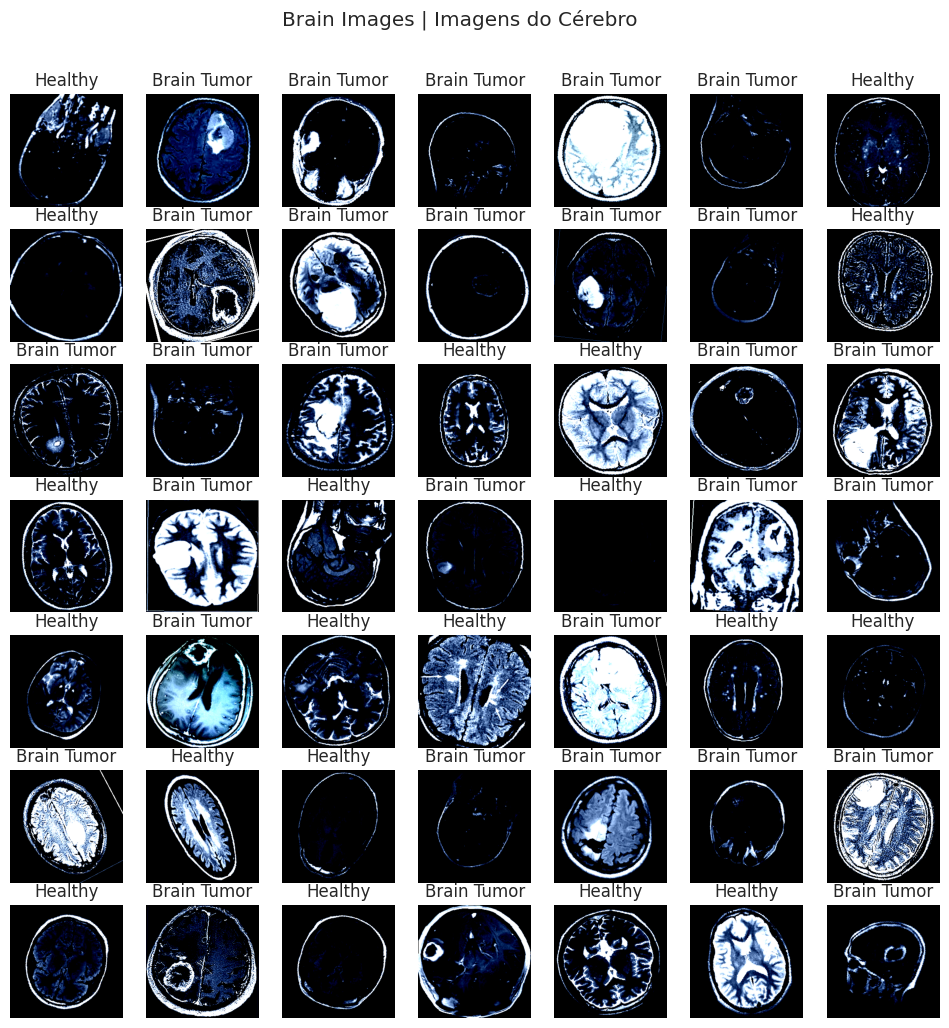

In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np

# Function to visualize some images from the training set | Função para visualizar algumas imagens do conjunto de treinamento
def visualize_images(train_set, label_map, num_images=49, cols=7):
    """
    Visualize images from the training set with their labels.

    Args:
    - train_set (Dataset): Training dataset.
    - label_map (dict): Dictionary mapping label indices to label names.
    - num_images (int, optional): Number of images to display. Default is 49.
    - cols (int, optional): Number of columns in the display grid. Default is 7.
    """
    # Calculate number of rows needed | Calcula o número de linhas necessárias
    rows = num_images // cols + (num_images % cols > 0)
    figure = plt.figure(figsize=(12, 12))

    for i in range(1, num_images + 1):
        # Randomly select an image from the training set | Seleciona aleatoriamente uma imagem do conjunto de treinamento
        sample_idx = torch.randint(len(train_set), size=(1,)).item()
        img, label = train_set[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(label_map[label])
        plt.axis("off")

        # Convert tensor to numpy array and adjust channel order | Converte tensor para numpy array e ajusta a ordem dos canais
        img_np = img.numpy().transpose((1, 2, 0))

        # Clip pixel values to [0, 1] | Clipa os valores dos pixels para o intervalo [0, 1]
        img_valid_range = np.clip(img_np, 0, 1)
        plt.imshow(img_valid_range)

    # Add a super title to the figure | Adiciona um título à figura
    plt.suptitle('Brain Images | Imagens do Cérebro', y=0.95)
    plt.show()

# Label dictionary | Dicionário de rótulos
CLA_label = {
    0: 'Brain Tumor',
    1: 'Healthy'
}

# Example usage | Exemplo de uso
visualize_images(train_set, CLA_label, num_images=49, cols=7)

#Creating DataLoaders

In [ ]:
import torch
from torch.utils.data import DataLoader

# Batch size for loading data | Tamanho do lote para carregar os dados
batch_size = 64

# Create DataLoader for training set | Cria DataLoader para o conjunto de treinamento
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)

# Create DataLoader for validation set | Cria DataLoader para o conjunto de validação
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=2)


In [ ]:
# print shape for Training data and Validation data | imprime o formato para dados de treinamento e dados de validação
for key, value in {'Training data': train_loader, "Validation data": val_loader}.items():
    for X, y in value:
        print(f"{key}:")
        print(f"Shape of X : {X.shape}")
        print(f"Shape of y: {y.shape} {y.dtype}\n")
        break

Training data:
Shape of X : torch.Size([64, 3, 256, 256])
Shape of y: torch.Size([64]) torch.int64

Validation data:
Shape of X : torch.Size([64, 3, 256, 256])
Shape of y: torch.Size([64]) torch.int64



#Define Brain Tumor Classifier

In [ ]:
import numpy as np
import torch.nn as nn

# Function to calculate the output size of a 2D convolutional layer | Função para calcular o tamanho da saída de uma camada convolucional 2D
def find_conv2d_out_shape(h_in, w_in, conv, pool=2):
    """
    Calculate the output size of a 2D convolutional layer.

    Args:
    - h_in (int): Input height. | Altura da entrada.
    - w_in (int): Input width. | Largura da entrada.
    - conv (nn.Conv2d): PyTorch 2D convolutional layer object. | Objeto da camada convolucional 2D do PyTorch.
    - pool (int, optional): Pooling factor (downsampling). Default is 2. | Fator de pooling (subamostragem). Padrão é 2.

    Returns:
    - (int, int): Output height and width after convolution (and pooling, if applicable). | Altura e largura da saída após a convolução (e pooling, se aplicável).
    """
    # Get convolution layer parameters | Obtém os parâmetros da camada convolucional
    kernel_size = conv.kernel_size
    stride = conv.stride
    padding = conv.padding
    dilation = conv.dilation

    # Calculate output height and width after convolution | Calcula a altura e largura da saída após a convolução
    h_out = np.floor((h_in + 2 * padding[0] - dilation[0] * (kernel_size[0] - 1) - 1) / stride[0] + 1)
    w_out = np.floor((w_in + 2 * padding[1] - dilation[1] * (kernel_size[1] - 1) - 1) / stride[1] + 1)

    # Adjust output dimensions if pooling factor is valid | Ajusta as dimensões da saída se o fator de pooling for válido
    if pool and pool > 0:
        h_out /= pool
        w_out /= pool

    # Return output dimensions as integers | Retorna as dimensões da saída como inteiros
    return int(h_out), int(w_out)

# Example usage | Exemplo de uso
# conv_layer = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
# height_out, width_out = find_conv2d_out_shape(128, 128, conv_layer, pool=2)
# print(f"Output dimensions: ({height_out}, {width_out})")


In [ ]:
# Define Architecture For CNN_TUMOR Model
class CNN_TUMOR(nn.Module):

    # Network Initialisation
    def __init__(self, params):

        super(CNN_TUMOR, self).__init__()

        Cin,Hin,Win = params["shape_in"]
        init_f = params["initial_filters"]
        num_fc1 = params["num_fc1"]
        num_classes = params["num_classes"]
        self.dropout_rate = params["dropout_rate"]

        # Convolution Layers
        self.conv1 = nn.Conv2d(Cin, init_f, kernel_size=3)
        h,w=find_conv2d_out_shape(Hin,Win,self.conv1)
        self.conv2 = nn.Conv2d(init_f, 2*init_f, kernel_size=3)
        h,w=find_conv2d_out_shape(h,w,self.conv2)
        self.conv3 = nn.Conv2d(2*init_f, 4*init_f, kernel_size=3)
        h,w=find_conv2d_out_shape(h,w,self.conv3)
        self.conv4 = nn.Conv2d(4*init_f, 8*init_f, kernel_size=3)
        h,w=find_conv2d_out_shape(h,w,self.conv4)

        # compute the flatten size
        self.num_flatten=h*w*8*init_f
        self.fc1 = nn.Linear(self.num_flatten, num_fc1)
        self.fc2 = nn.Linear(num_fc1, num_classes)

    def forward(self,X):

        # Convolution & Pool Layers
        X = F.relu(self.conv1(X));
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv3(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv4(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, self.num_flatten)
        X = F.relu(self.fc1(X))
        X = F.dropout(X, self.dropout_rate)
        X = self.fc2(X)
        return F.log_softmax(X, dim=1)

In [ ]:
params_model={
        "shape_in": (3,256,256),
        "initial_filters": 8,
        "num_fc1": 100,
        "dropout_rate": 0.25,
        "num_classes": 2}

# Create instantiation of Network class
cnn_model = CNN_TUMOR(params_model)

# define computation hardware approach (GPU/CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = cnn_model.to(device)

In [ ]:
# Model Summary for CNN Model
summary(cnn_model, input_size=(3, 256, 256),device=device.type)

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            224
├─Conv2d: 1-2                            1,168
├─Conv2d: 1-3                            4,640
├─Conv2d: 1-4                            18,496
├─Linear: 1-5                            1,254,500
├─Linear: 1-6                            202
Total params: 1,279,230
Trainable params: 1,279,230
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            224
├─Conv2d: 1-2                            1,168
├─Conv2d: 1-3                            4,640
├─Conv2d: 1-4                            18,496
├─Linear: 1-5                            1,254,500
├─Linear: 1-6                            202
Total params: 1,279,230
Trainable params: 1,279,230
Non-trainable params: 0

# Loss Function Definition

In [ ]:
loss_func = nn.NLLLoss(reduction="sum")

# Optimiser Definition

In [ ]:
opt = optim.Adam(cnn_model.parameters(), lr=3e-4)
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

# Training Model

In [ ]:
# Function to get the learning rate | Função para obter a taxa de aprendizado
def get_lr(opt):
    """
    Get the current learning rate from the optimizer.

    Args:
    - opt (torch.optim.Optimizer): PyTorch optimizer object. | Objeto otimizador PyTorch.

    Returns:
    - float: Current learning rate. | Taxa de aprendizado atual.
    """
    for param_group in opt.param_groups:
        return param_group['lr']

# Function to compute the loss value per batch of data | Função para calcular o valor da perda por lote de dados
def loss_batch(loss_func, output, target, opt=None):
    """
    Compute the loss and performance metric for a batch of data.

    Args:
    - loss_func (callable): Loss function. | Função de perda.
    - output (torch.Tensor): Model output. | Saída do modelo.
    - target (torch.Tensor): Ground truth labels. | Rótulos verdadeiros.
    - opt (torch.optim.Optimizer, optional): PyTorch optimizer object. Default is None. | Objeto otimizador PyTorch. Padrão é None.

    Returns:
    - float: Loss value. | Valor da perda.
    - int: Performance metric value. | Valor da métrica de desempenho.
    """
    loss = loss_func(output, target)  # Get loss | Obtém a perda
    pred = output.argmax(dim=1, keepdim=True)  # Get output class | Obtém a classe de saída
    metric_b = pred.eq(target.view_as(pred)).sum().item()  # Get performance metric | Obtém a métrica de desempenho

    if opt is not None:
        opt.zero_grad()  # Zero gradients | Zera os gradientes
        loss.backward()  # Backpropagate loss | Realiza a retropropagação da perda
        opt.step()  # Update parameters | Atualiza os parâmetros

    return loss.item(), metric_b

# Compute the loss value & performance metric for the entire dataset (epoch) | Calcula o valor da perda e a métrica de desempenho para todo o conjunto de dados (época)
def loss_epoch(model, loss_func, dataset_dl, opt=None):
    """
    Compute the loss and performance metric for an entire epoch.

    Args:
    - model (torch.nn.Module): PyTorch model. | Modelo PyTorch.
    - loss_func (callable): Loss function. | Função de perda.
    - dataset_dl (torch.utils.data.DataLoader): DataLoader for the dataset. | DataLoader para o conjunto de dados.
    - opt (torch.optim.Optimizer, optional): PyTorch optimizer object. Default is None. | Objeto otimizador PyTorch. Padrão é None.

    Returns:
    - float: Average loss value. | Valor médio da perda.
    - float: Average performance metric value. | Valor médio da métrica de desempenho.
    """
    run_loss = 0.0  # Initialize running loss | Inicializa a perda acumulada
    t_metric = 0.0  # Initialize running metric | Inicializa a métrica acumulada
    len_data = len(dataset_dl.dataset)  # Get the length of the dataset | Obtém o tamanho do conjunto de dados

    # Internal loop over dataset | Loop interno sobre o conjunto de dados
    for xb, yb in dataset_dl:
        xb = xb.to(device)  # Move batch to device | Move o lote para o dispositivo
        yb = yb.to(device)  # Move labels to device | Move os rótulos para o dispositivo
        output = model(xb)  # Get model output | Obtém a saída do modelo
        loss_b, metric_b = loss_batch(loss_func, output, yb, opt)  # Get loss per batch | Obtém a perda por lote
        run_loss += loss_b  # Update running loss | Atualiza a perda acumulada

        if metric_b is not None:  # Update running metric if available | Atualiza a métrica acumulada se disponível
            t_metric += metric_b

    loss = run_loss / float(len_data)  # Calculate average loss value | Calcula o valor médio da perda
    metric = t_metric / float(len_data)  # Calculate average metric value | Calcula o valor médio da métrica

    return loss, metric


In [ ]:
# Function to train and validate the model | Função para treinar e validar o modelo
def Train_Val(model, params, verbose=False):
    """
    Train and validate the model.

    Args:
    - model (torch.nn.Module): PyTorch model to be trained. | Modelo PyTorch a ser treinado.
    - params (dict): Dictionary of parameters including epochs, loss function, optimizer, dataloaders, lr_scheduler, and weight path. | Dicionário de parâmetros incluindo épocas, função de perda, otimizador, dataloaders, lr_scheduler e caminho dos pesos.
    - verbose (bool, optional): Whether to print progress messages. Default is False. | Se deve imprimir mensagens de progresso. Padrão é False.

    Returns:
    - model (torch.nn.Module): The trained model with best weights. | O modelo treinado com os melhores pesos.
    - loss_history (dict): History of loss values for training and validation. | Histórico de valores de perda para treinamento e validação.
    - metric_history (dict): History of metric values for training and validation. | Histórico de valores de métrica para treinamento e validação.
    """
    # Get the parameters | Obtém os parâmetros
    epochs = params["epochs"]
    loss_func = params["f_loss"]
    opt = params["optimiser"]
    train_dl = params["train"]
    val_dl = params["val"]
    lr_scheduler = params["lr_change"]
    weight_path = params["weight_path"]

    # History of loss values in each epoch | Histórico de valores de perda em cada época
    loss_history = {"train": [], "val": []}
    # History of metric values in each epoch | Histórico de valores de métrica em cada época
    metric_history = {"train": [], "val": []}
    # A deep copy of weights for the best performing model | Uma cópia profunda dos pesos para o melhor modelo
    best_model_wts = copy.deepcopy(model.state_dict())
    # Initialize best loss to a large value | Inicializa a melhor perda para um valor grande
    best_loss = float('inf')

    # Train Model n_epochs | Treina o modelo por n épocas
    for epoch in tqdm(range(epochs)):
        # Get the learning rate | Obtém a taxa de aprendizado
        current_lr = get_lr(opt)
        if verbose:
            print('Epoch {}/{}, current lr={}'.format(epoch, epochs - 1, current_lr))

        # Train model process | Processo de treinamento do modelo
        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, opt)

        # Collect losses | Coleta as perdas
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)

        # Evaluate model process | Processo de avaliação do modelo
        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl)

        # Store best model | Armazena o melhor modelo
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())

            # Store weights into a local file | Armazena os pesos em um arquivo local
            torch.save(model.state_dict(), weight_path)
            if verbose:
                print("Copied best model weights!")

        # Collect loss and metric for validation dataset | Coleta a perda e métrica para o conjunto de dados de validação
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)

        # Learning rate schedule | Agenda de taxa de aprendizado
        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            if verbose:
                print("Loading best model weights!")
            model.load_state_dict(best_model_wts)

        if verbose:
            print(f"Train loss: {train_loss:.6f}, Val loss: {val_loss:.6f}, Accuracy: {100 * val_metric:.2f}")
            print("-" * 10)

    # Load best model weights | Carrega os melhores pesos do modelo
    model.load_state_dict(best_model_wts)

    return model, loss_history, metric_history

In [ ]:
# Define various parameters used for training and evaluation of a CNN model | Define vários parâmetros usados para treinamento e avaliação de um modelo CNN
params_train = {
    "train": train_loader,  # DataLoader for training set | DataLoader para o conjunto de treinamento
    "val": val_loader,  # DataLoader for validation set | DataLoader para o conjunto de validação
    "epochs": 60,  # Number of training epochs | Número de épocas de treinamento
    "optimiser": optim.Adam(cnn_model.parameters(), lr=3e-4),  # Optimizer for training | Otimizador para treinamento
    "lr_change": ReduceLROnPlateau(
        optim.Adam(cnn_model.parameters(), lr=3e-4),  # Learning rate scheduler | Agendador de taxa de aprendizado
        mode='min',
        factor=0.5,
        patience=20,
        verbose=0
    ),
    "f_loss": nn.NLLLoss(reduction="sum"),  # Loss function | Função de perda
    "weight_path": "weights.pt"  # Path to save the model weights | Caminho para salvar os pesos do modelo
}

# Train and validate the model | Treina e valida o modelo
cnn_model, loss_hist, metric_hist = Train_Val(cnn_model, params_train, verbose=True)

  0%|          | 0/60 [00:00<?, ?it/s]

Epoch 0/59, current lr=0.0003
Copied best model weights!
Train loss: 0.612130, Val loss: 0.591560, Accuracy: 67.54
----------
Epoch 1/59, current lr=0.0003
Copied best model weights!
Train loss: 0.501455, Val loss: 0.500070, Accuracy: 75.57
----------
Epoch 2/59, current lr=0.0003
Copied best model weights!
Train loss: 0.413605, Val loss: 0.452165, Accuracy: 79.48
----------
Epoch 3/59, current lr=0.0003
Copied best model weights!
Train loss: 0.403484, Val loss: 0.375411, Accuracy: 82.95
----------
Epoch 4/59, current lr=0.0003
Copied best model weights!
Train loss: 0.355267, Val loss: 0.351111, Accuracy: 84.26
----------
Epoch 5/59, current lr=0.0003
Copied best model weights!
Train loss: 0.334172, Val loss: 0.335148, Accuracy: 85.23
----------
Epoch 6/59, current lr=0.0003
Train loss: 0.330001, Val loss: 0.371408, Accuracy: 83.39
----------
Epoch 7/59, current lr=0.0003
Train loss: 0.306169, Val loss: 0.344879, Accuracy: 85.02
----------
Epoch 8/59, current lr=0.0003
Copied best mode

# Evaluation Metric Visualization

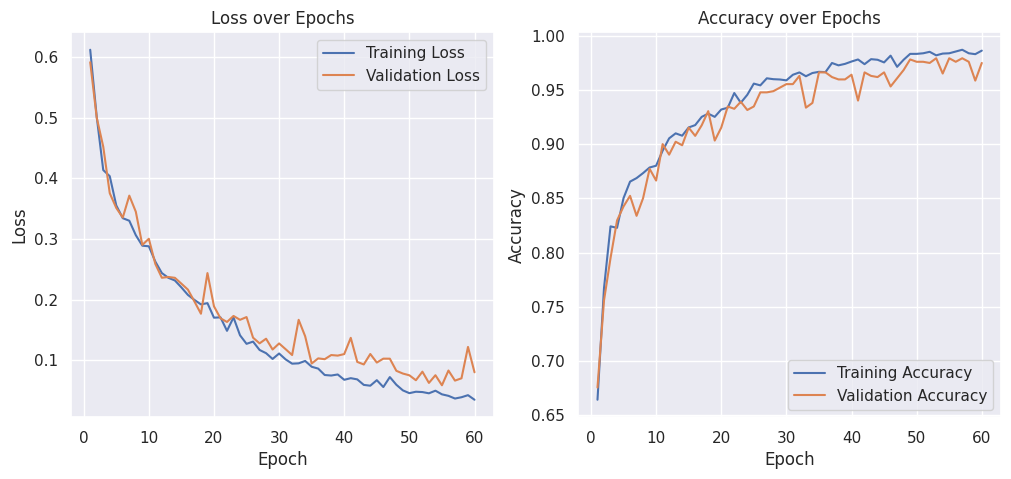

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convergence History Plot | Plotagem do Histórico de Convergência
epochs = params_train["epochs"]

# Create subplots | Cria subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot training and validation loss | Plota a perda de treinamento e validação
sns.lineplot(x=range(1, epochs + 1), y=loss_hist["train"], ax=ax[0], label='Training Loss')
sns.lineplot(x=range(1, epochs + 1), y=loss_hist["val"], ax=ax[0], label='Validation Loss')

# Plot training and validation accuracy | Plota a acurácia de treinamento e validação
sns.lineplot(x=range(1, epochs + 1), y=metric_hist["train"], ax=ax[1], label='Training Accuracy')
sns.lineplot(x=range(1, epochs + 1), y=metric_hist["val"], ax=ax[1], label='Validation Accuracy')

# Set titles and labels for loss plot | Define títulos e rótulos para o plot de perda
ax[0].set_title('Loss over Epochs')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')

# Set titles and labels for accuracy plot | Define títulos e rótulos para o plot de acurácia
ax[1].set_title('Accuracy over Epochs')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')

# Display the legend | Exibe a legenda
ax[0].legend()
ax[1].legend()

# Show the plot | Mostra o plot
plt.show()

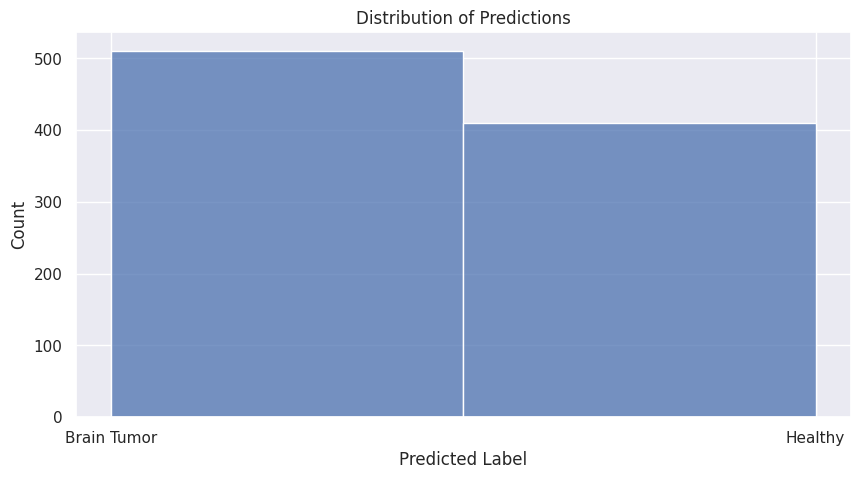

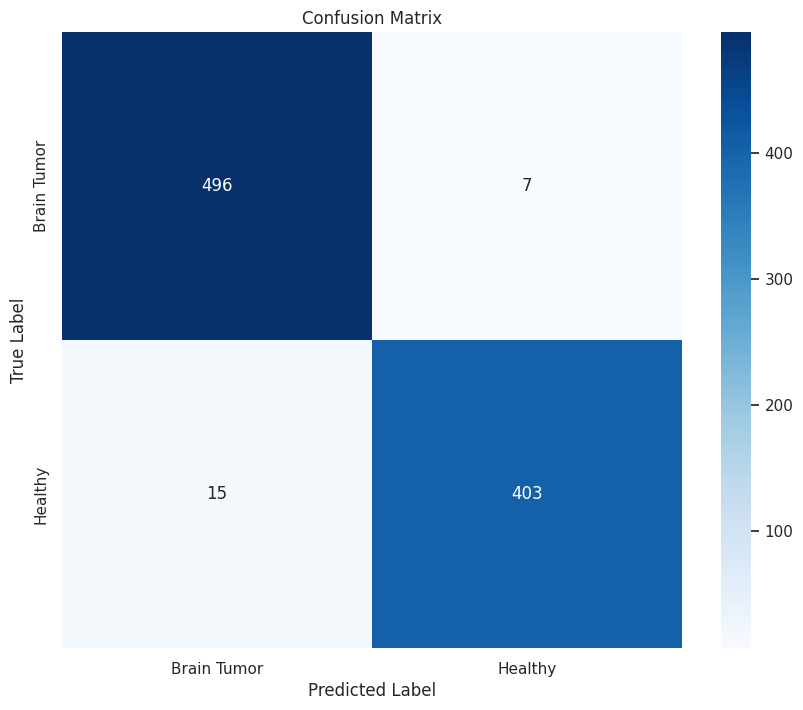

Classification Report:
               precision    recall  f1-score   support

 Brain Tumor       0.97      0.99      0.98       503
     Healthy       0.98      0.96      0.97       418

    accuracy                           0.98       921
   macro avg       0.98      0.98      0.98       921
weighted avg       0.98      0.98      0.98       921



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Function to plot the distribution of predictions | Função para plotar a distribuição das predições
def plot_prediction_distribution(y_true, y_pred, label_map):
    plt.figure(figsize=(10, 5))
    sns.histplot(y_pred, kde=False, bins=len(label_map), stat="count")
    plt.title("Distribution of Predictions")
    plt.xlabel("Predicted Label")
    plt.ylabel("Count")
    plt.xticks(ticks=np.arange(len(label_map)), labels=label_map.values())
    plt.show()

# Function to plot confusion matrix | Função para plotar a matriz de confusão
def plot_confusion_matrix(y_true, y_pred, label_map):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.values(), yticklabels=label_map.values())
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Function to print classification report | Função para imprimir o relatório de classificação
def print_classification_report(y_true, y_pred, label_map):
    report = classification_report(y_true, y_pred, target_names=label_map.values())
    print("Classification Report:\n", report)

# Example usage after training the model | Exemplo de uso após treinar o modelo
def evaluate_model(model, val_dl, label_map):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for xb, yb in val_dl:
            xb = xb.to(device)
            yb = yb.to(device)
            output = model(xb)
            preds = output.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(yb.cpu().numpy())

    y_true = np.array(all_labels)
    y_pred = np.array(all_preds)

    plot_prediction_distribution(y_true, y_pred, label_map)
    plot_confusion_matrix(y_true, y_pred, label_map)
    print_classification_report(y_true, y_pred, label_map)

# Define label map | Define o mapa de rótulos
label_map = {
    0: 'Brain Tumor',
    1: 'Healthy'
}

# Evaluate the model | Avalia o modelo
evaluate_model(cnn_model, val_loader, label_map)


In [ ]:
torch.save(cnn_model, "Brain_Tumor_model_esashika.pt")

Rhedson Esashika\
X: rhedesashika \
Instagram: @rhedson\
LinkedIn: www.linkedin.com/in/esashika/